# Проект: Обучение с учителем: качество модели

## Описание проекта:
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

222

##  Ход работы:
1. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
2. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
3. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

## Описание данных
**market_file.csv** - таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
* id — номер покупателя в корпоративной базе данных.
* Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
* Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
* Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
* Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
* Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
* Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
* Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
* Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
* Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
* Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
* Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
* Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**market_money.csv** - таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
* id — номер покупателя в корпоративной базе данных.
* Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
Выручка — сумма выручки за период.

**market_time.csv** - таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
* id — номер покупателя в корпоративной базе данных.
* Период — название периода, во время которого зафиксировано общее время.
минут — значение времени, проведённого на сайте, в минутах.

**money.csv** - таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
* id — номер покупателя в корпоративной базе данных.
* Прибыль — значение прибыли.

### Загрузка данных

In [ ]:
!pip install -U scikit-learn -q

In [ ]:
!pip install -Uq matplotlib

In [1]:
!pip install phik -q

In [ ]:
pip install seaborn --upgrade -q

In [3]:
!pip install shap -q

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler,
    RobustScaler,
    LabelEncoder
)
 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import shap

import warnings
warnings.filterwarnings('ignore')

RANDOM_STATE = 42
TEST_SIZE = 0.25

In [8]:
market_file = pd.read_csv('market_file.csv')
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [9]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [10]:
market_money = pd.read_csv('market_money.csv')
market_money

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
...,...,...,...
3895,216646,препредыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,препредыдущий_месяц,5183.0


In [11]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [12]:
market_time = pd.read_csv('market_time.csv')
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [13]:
money = pd.read_csv('money.csv', sep=';')
money.head()

,id,Прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"


Вывод: данные загружены и помещены в переменные. Данные в таблицах соотвествуют описанию

### Предобработка данных

In [14]:
# приводим названия столбцов к змеиному регистру
market_file = market_file.rename(
    columns={'Покупательская активность':'Покупательская_активность', 
             'Тип сервиса':'Тип_сервиса', 
             'Разрешить сообщать':'Разрешить_сообщать'}
    )
market_file.columns = market_file.columns.str.lower()

In [15]:
# удаляем неявный дубликат
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт','стандарт')

In [16]:
market_file.duplicated().sum()

0

Пропуски и дубликаты в market_file отсутствуют

In [17]:
# приводим названия столбцов к змеиному регистру
market_money.columns = market_money.columns.str.lower()

In [18]:
market_money.duplicated().sum()

0

Пропуски и дубликаты в market_money отсутствуют

In [19]:
market_time.columns = market_time.columns.str.lower()

In [20]:
market_time['период'] = market_time['период'].replace('предыдцщий_месяц','предыдущий_месяц')
market_time.duplicated().sum()

0

Пропуски и дубликаты в market_time отсутствуют

In [21]:
money.columns = money.columns.str.lower()
money['прибыль'] = money['прибыль'].str.replace(',','.')
# переводим тип прибыли object в float
money['прибыль'] = pd.to_numeric(money['прибыль'])
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [22]:
money.duplicated().sum()

0

Пропуски и дубликаты в money отсутствуют

Вывод: в ходе предобработки данных стобцы были приведены к змеиному регистру, были удалены неявные дубликаты в market_file и market_time, тип прибыли object в money был переведен во float. 

### Исследовательский анализ данных

#### Категориальные признаки

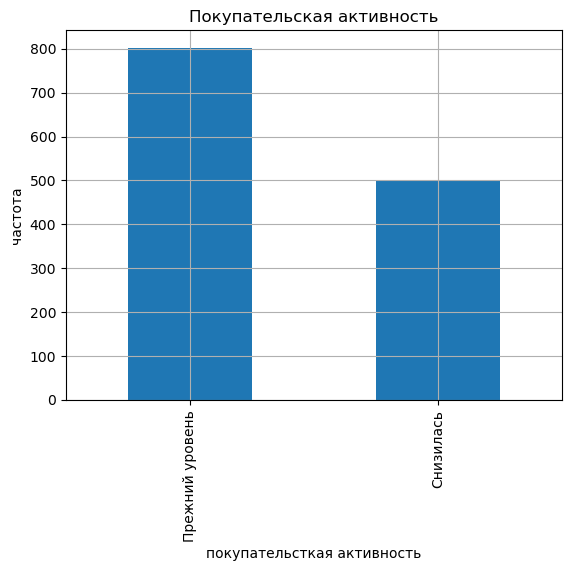

In [23]:
market_file['покупательская_активность'].value_counts().plot(kind='bar', title='Покупательская активность', grid=True)
plt.xlabel('покупательсткая активность')
plt.ylabel('частота')
plt.show()

Наблюдается дисбаланс классов: клиентов со сниженным уровнем покупательской активности меньше. 

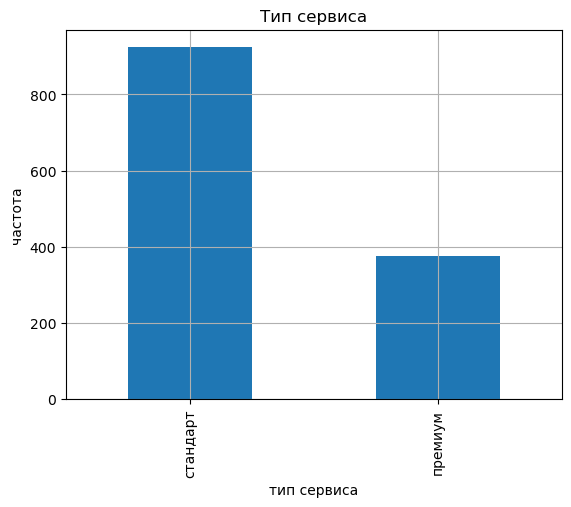

In [24]:
market_file['тип_сервиса'].value_counts().plot(kind='bar', title='Тип сервиса', grid=True)
plt.xlabel('тип сервиса')
plt.ylabel('частота')
plt.show()

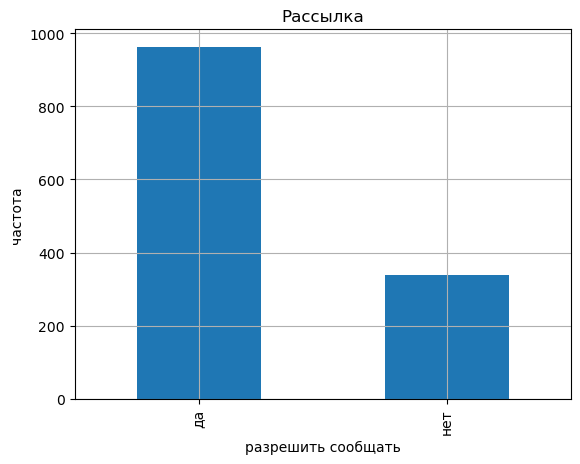

In [25]:
market_file['разрешить_сообщать'].value_counts().plot(kind='bar', title='Рассылка', grid=True)
plt.xlabel('разрешить сообщать')
plt.ylabel('частота')
plt.show()

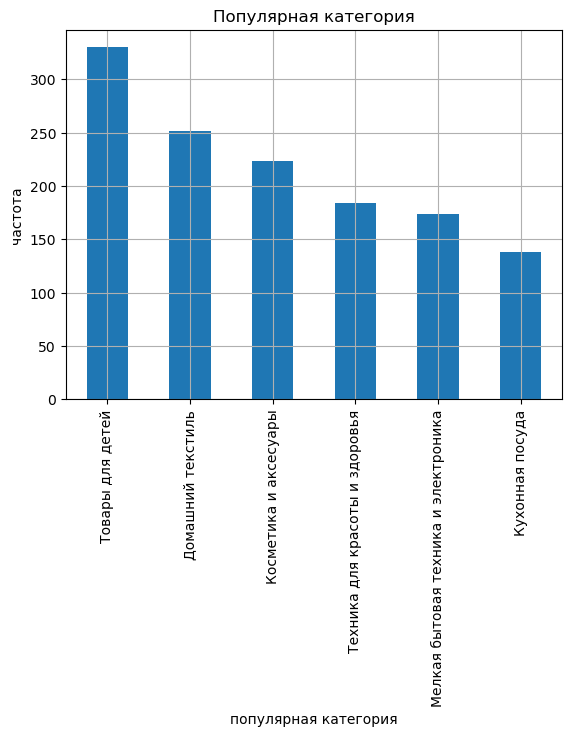

In [26]:
market_file['популярная_категория'].value_counts().plot(kind='bar', title='Популярная категория', grid=True)
plt.xlabel('популярная категория')
plt.ylabel('частота')
plt.show()

Самая популярная категория - товары для детей. На последнем месте - кухонная посуда

#### Количественные признаки

In [27]:
market_file.select_dtypes(include='number').columns.to_list()

['id',
 'маркет_актив_6_мес',
 'маркет_актив_тек_мес',
 'длительность',
 'акционные_покупки',
 'средний_просмотр_категорий_за_визит',
 'неоплаченные_продукты_штук_квартал',
 'ошибка_сервиса',
 'страниц_за_визит']

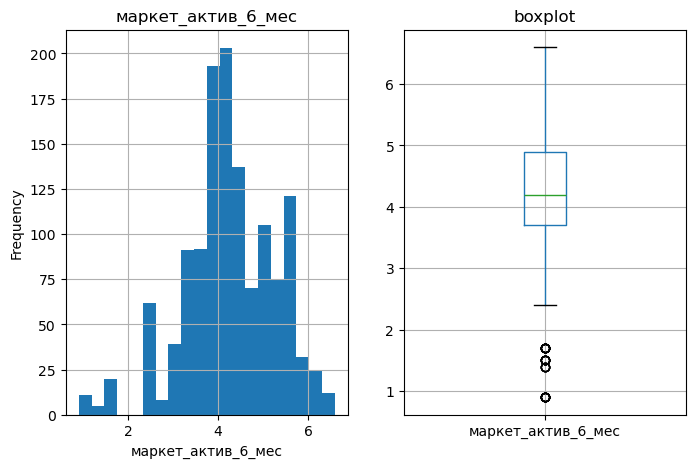

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64

In [28]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
market_file['маркет_актив_6_мес'].plot(kind='hist', bins = 20, grid=True, title='маркет_актив_6_мес')
plt.xlabel('маркет_актив_6_мес')
plt.subplot(1,2,2)
market_file.boxplot('маркет_актив_6_мес')
plt.title('boxplot')
plt.show()
market_file['маркет_актив_6_мес'].describe()

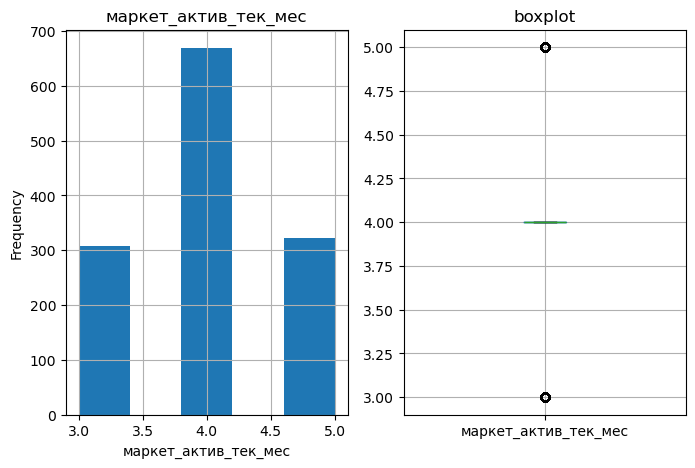

count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64

In [29]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
market_file['маркет_актив_тек_мес'].plot(kind='hist', bins = 5, grid=True, title='маркет_актив_тек_мес')
plt.xlabel('маркет_актив_тек_мес')
plt.subplot(1,2,2)
market_file.boxplot('маркет_актив_тек_мес')
plt.title('boxplot')
plt.show()
market_file['маркет_актив_тек_мес'].describe()

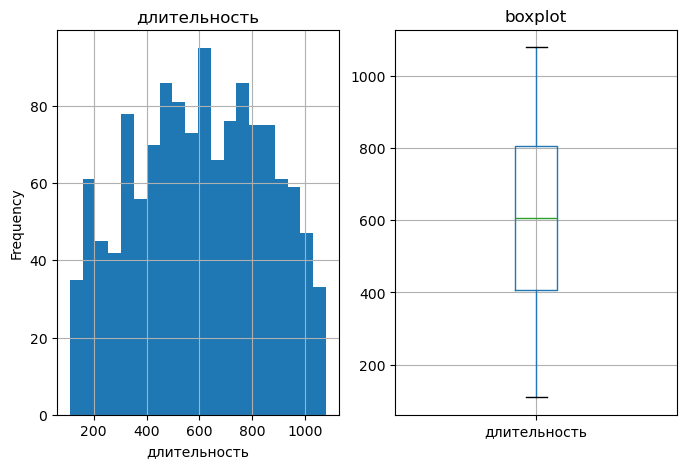

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64

In [30]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
market_file['длительность'].plot(kind='hist', bins = 20, grid=True, title='длительность')
plt.xlabel('длительность')
plt.subplot(1,2,2)
market_file.boxplot('длительность')
plt.title('boxplot')
plt.show()
market_file['длительность'].describe()

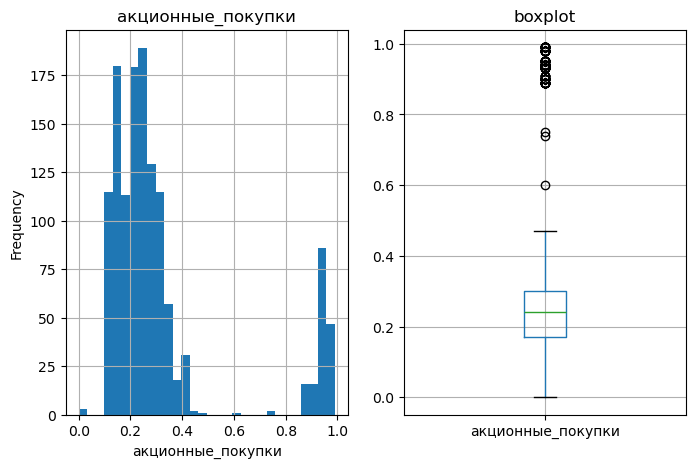

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64

In [31]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
market_file['акционные_покупки'].plot(kind='hist', bins = 30, grid=True, title='акционные_покупки')
plt.xlabel('акционные_покупки')
plt.subplot(1,2,2)
market_file.boxplot('акционные_покупки')
plt.title('boxplot')
plt.show()
market_file['акционные_покупки'].describe()

Наблюдается бимодальное распределение. У части клиентов доля акционных покупок приближается к 100%

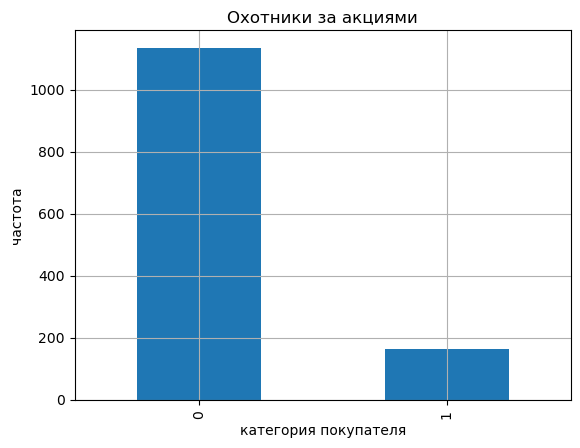

In [32]:
market_file['охотники_за_акциями'] = market_file['акционные_покупки'].apply(lambda x: 1 if x>0.8 else 0)
market_file['охотники_за_акциями'].value_counts().plot(kind='bar', title='Охотники за акциями', grid=True)
plt.xlabel('категория покупателя')
plt.ylabel('частота')
plt.show()

Text(0.5, 1.0, 'Зависимость покупательской активности от акционных покупок')

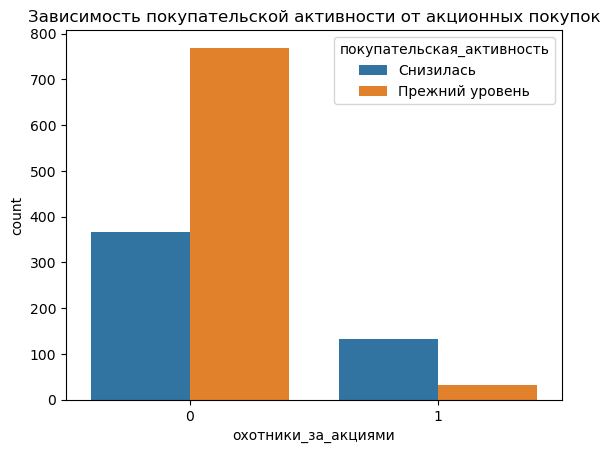

In [33]:
sns.countplot(data=market_file, x='охотники_за_акциями', hue='покупательская_активность')
plt.title('Зависимость покупательской активности от акционных покупок')

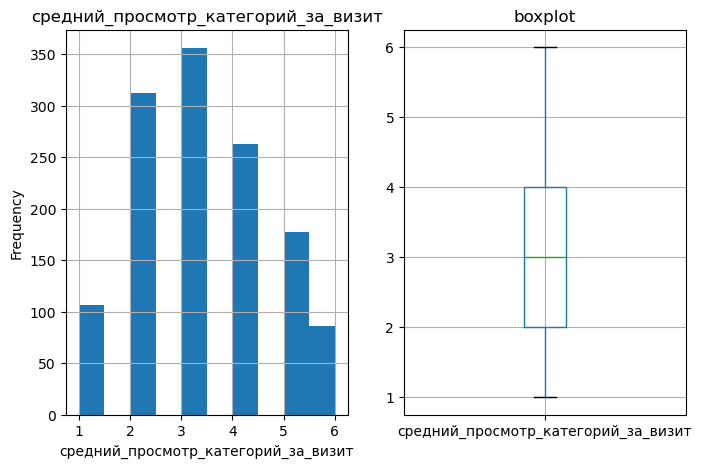

count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: средний_просмотр_категорий_за_визит, dtype: float64

In [34]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
market_file['средний_просмотр_категорий_за_визит'].plot(kind='hist', bins = 10, grid=True, title='средний_просмотр_категорий_за_визит')
plt.xlabel('средний_просмотр_категорий_за_визит')
plt.subplot(1,2,2)
market_file.boxplot('средний_просмотр_категорий_за_визит')
plt.title('boxplot')
plt.show()
market_file['средний_просмотр_категорий_за_визит'].describe()

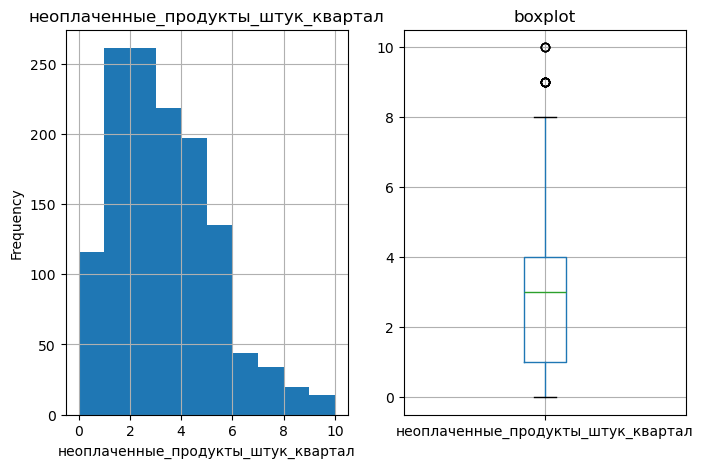

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64

In [35]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
market_file['неоплаченные_продукты_штук_квартал'].plot(kind='hist', bins = 10, grid=True, title='неоплаченные_продукты_штук_квартал')
plt.xlabel('неоплаченные_продукты_штук_квартал')
plt.subplot(1,2,2)
market_file.boxplot('неоплаченные_продукты_штук_квартал')
plt.title('boxplot')
plt.show()
market_file['неоплаченные_продукты_штук_квартал'].describe()

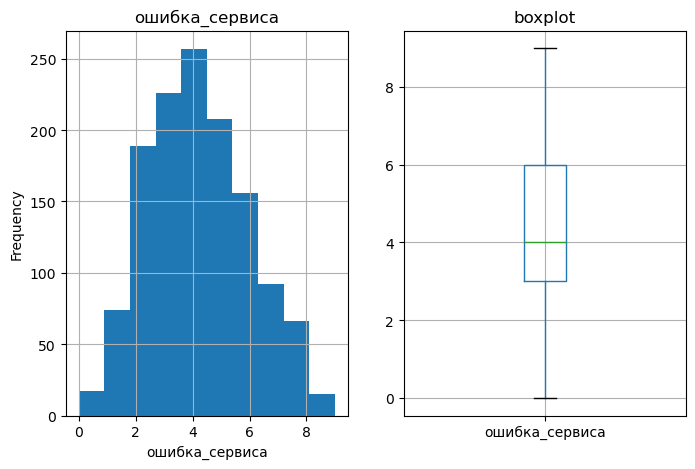

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64

In [36]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
market_file['ошибка_сервиса'].plot(kind='hist', bins = 10, grid=True, title='ошибка_сервиса')
plt.xlabel('ошибка_сервиса')
plt.subplot(1,2,2)
market_file.boxplot('ошибка_сервиса')
plt.title('boxplot')
plt.show()
market_file['ошибка_сервиса'].describe()

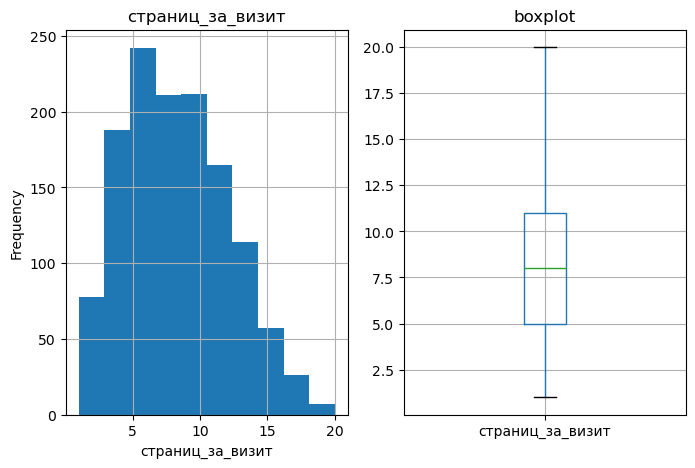

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64

In [37]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
market_file['страниц_за_визит'].plot(kind='hist', bins = 10, grid=True, title='страниц_за_визит')
plt.xlabel('страниц_за_визит')
plt.subplot(1,2,2)
market_file.boxplot('страниц_за_визит')
plt.title('boxplot')
plt.show()
market_file['страниц_за_визит'].describe()

**Таблица market_money**

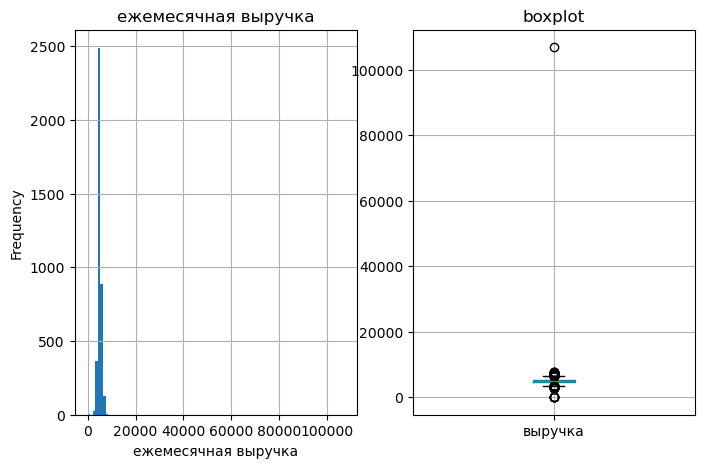

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64

In [38]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
market_money['выручка'].plot(kind='hist', bins = 100, grid=True, title='ежемесячная выручка')
plt.xlabel('ежемесячная выручка')
plt.subplot(1,2,2)
market_money.boxplot('выручка')
plt.title('boxplot')
plt.show()
market_money['выручка'].describe()

Видим явный выброс 106862.2. Удаляем его

In [39]:
market_money = market_money[market_money['выручка']<100000]
market_money = market_money[market_money['выручка']!=0]

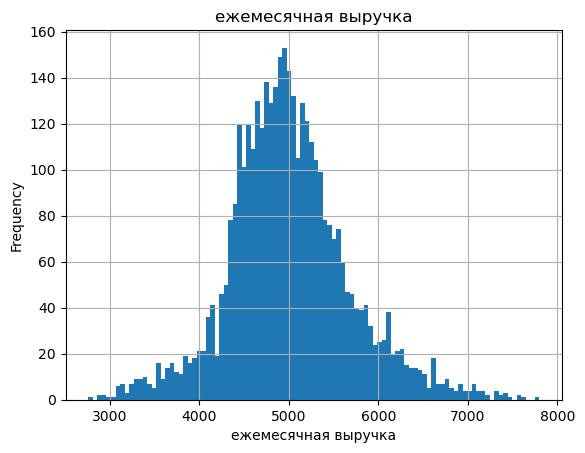

In [40]:
market_money['выручка'].plot(kind='hist', bins = 100, grid=True, title='ежемесячная выручка')
plt.xlabel('ежемесячная выручка')
plt.show()

**Таблица market_time**

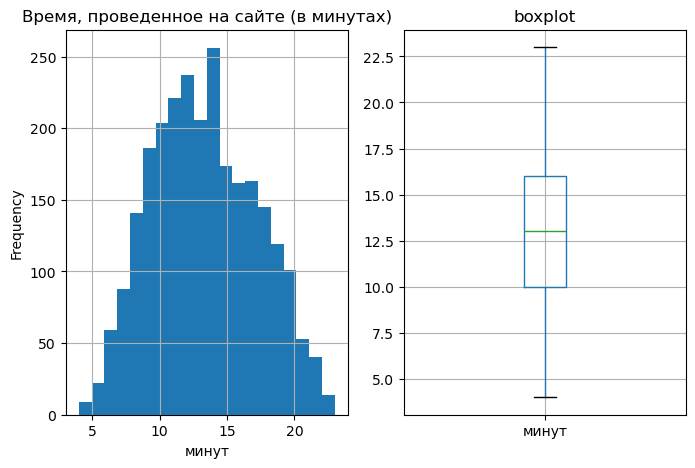

In [41]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
market_time['минут'].plot(kind='hist', bins = 20, grid=True, title='Время, проведенное на сайте (в минутах)')
plt.xlabel('минут')
plt.subplot(1,2,2)
market_time.boxplot('минут')
plt.title('boxplot')
plt.show()

**Таблица money**

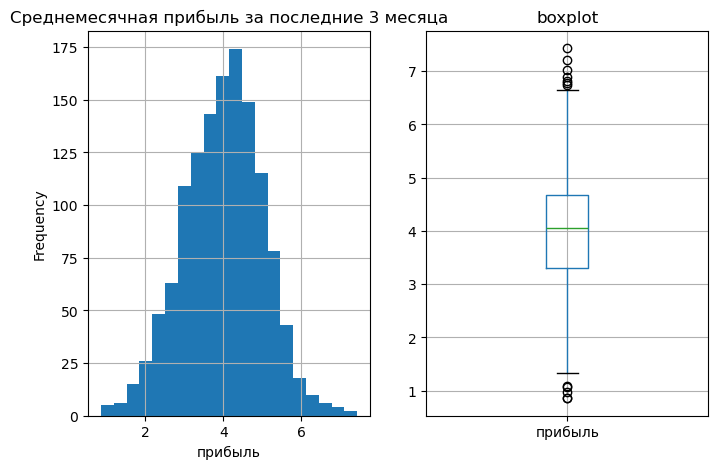

In [42]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
money['прибыль'].plot(kind='hist', bins = 20, grid=True, title='Среднемесячная прибыль за последние 3 месяца')
plt.xlabel('прибыль')
plt.subplot(1,2,2)
money.boxplot('прибыль')
plt.title('boxplot')
plt.show()

#### Исследовательский анализ в разрезе целевого признака Покупательская активность

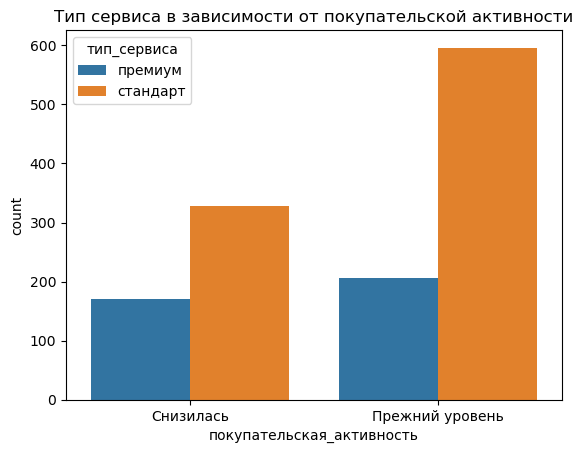

In [43]:
sns.countplot(data=market_file, x='покупательская_активность', hue='тип_сервиса')
plt.title('Тип сервиса в зависимости от покупательской активности')
plt.show()

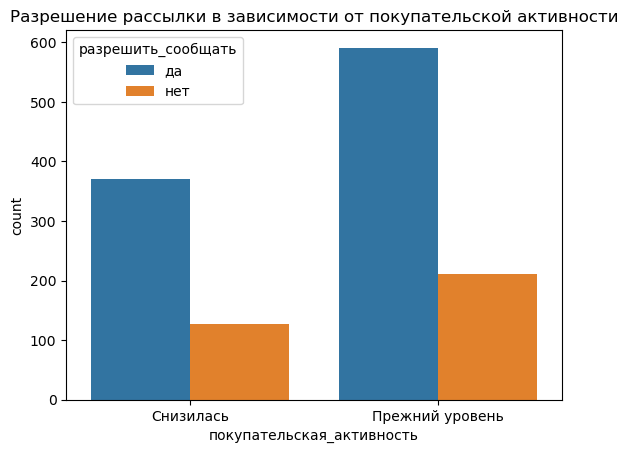

In [44]:
sns.countplot(data=market_file, x= 'покупательская_активность', hue='разрешить_сообщать')
plt.title('Разрешение рассылки в зависимости от покупательской активности')
plt.show()

Text(0.5, 1.0, 'Пониженный уровень покупательской активности')

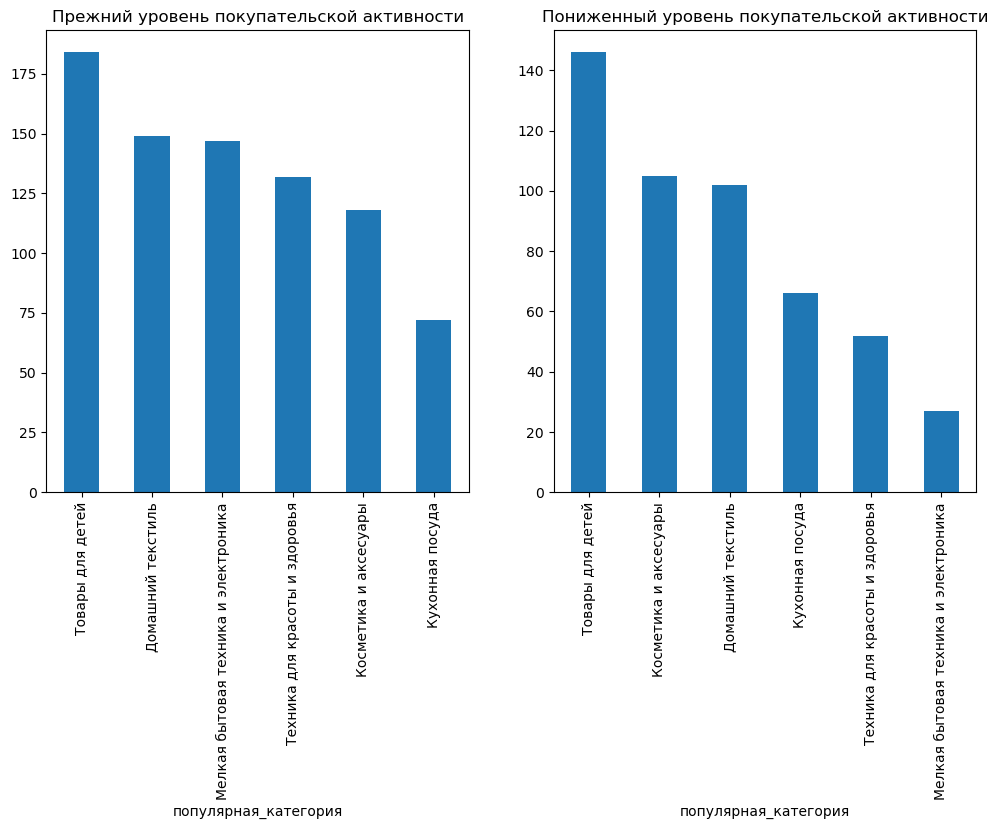

In [45]:
market_file_0 = market_file[market_file['покупательская_активность']=='Прежний уровень'].value_counts('популярная_категория')
market_file_1 = market_file[market_file['покупательская_активность']=='Снизилась'].value_counts('популярная_категория')

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
market_file_0.plot(kind='bar')
plt.title('Прежний уровень покупательской активности')
plt.subplot(1,2,2)
market_file_1.plot(kind='bar')
plt.title('Пониженный уровень покупательской активности')

* Самая популярная категория в обеих группах покупательской активности - товары для детей. 
* На втором месте по популярности у клиентов с низкой покупательской активностью категория "Косметика и акссесуары"
* На последнем месте по популярности у клиентов с низкой покупательской активностью категория "Мелкая бытовая техника и электроника"

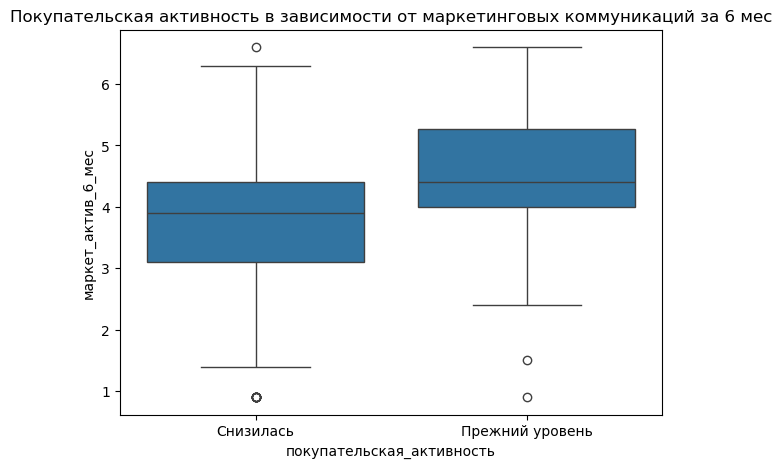

In [46]:
plt.figure(figsize=(7,5))
sns.boxplot(data=market_file, y='маркет_актив_6_мес', x='покупательская_активность')
plt.title('Покупательская активность в зависимости от маркетинговых коммуникаций за 6 мес')
plt.show()

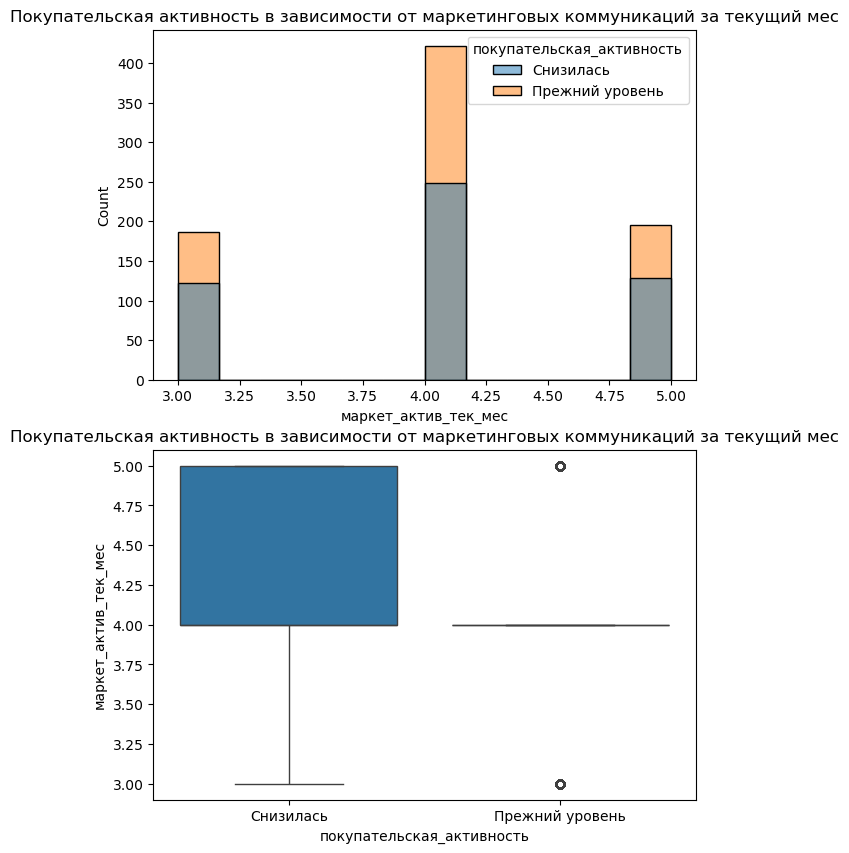

In [47]:
plt.figure(figsize=(7,10))
plt.subplot(2,1,1)
sns.histplot(data=market_file, x='маркет_актив_тек_мес', hue='покупательская_активность')
plt.title('Покупательская активность в зависимости от маркетинговых коммуникаций за текущий мес')
plt.subplot(2,1,2)
sns.boxplot(data=market_file, y='маркет_актив_тек_мес', x='покупательская_активность')
plt.title('Покупательская активность в зависимости от маркетинговых коммуникаций за текущий мес')
plt.show()

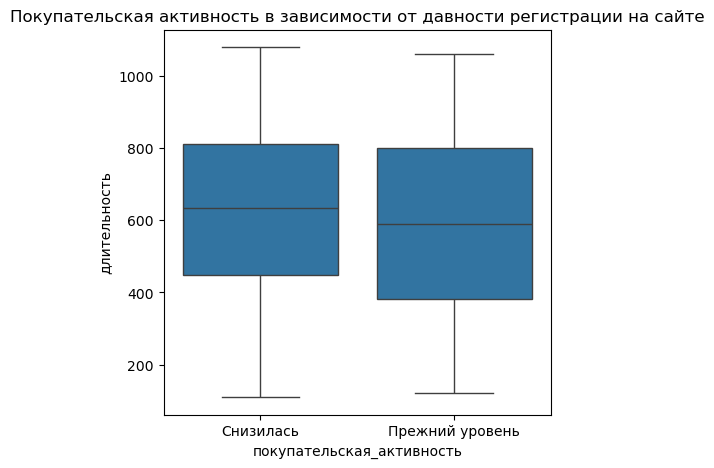

In [48]:
plt.figure(figsize=(5,5))
sns.boxplot(data=market_file, y='длительность', x='покупательская_активность')
plt.title('Покупательская активность в зависимости от давности регистрации на сайте')
plt.show()

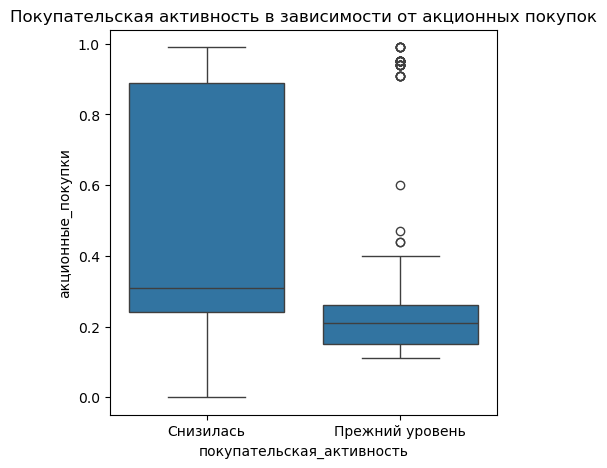

In [49]:
plt.figure(figsize=(5,5))
sns.boxplot(data=market_file, y='акционные_покупки', x='покупательская_активность')
plt.title('Покупательская активность в зависимости от акционных покупок')
plt.show()

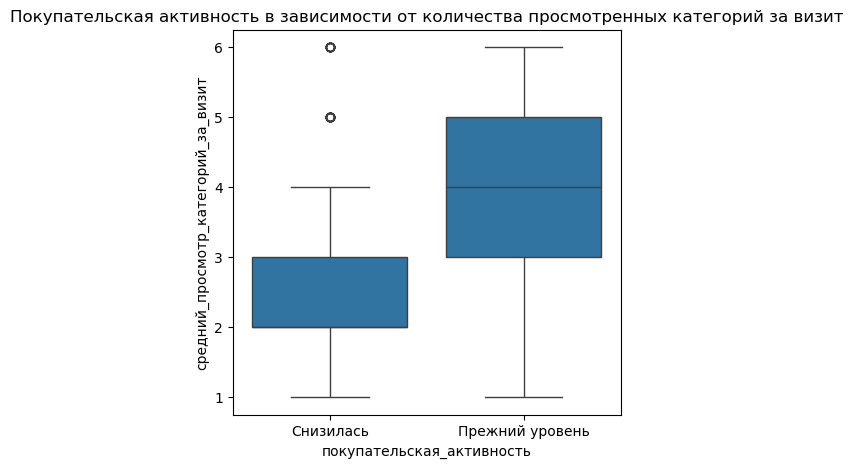

In [50]:
plt.figure(figsize=(5,5))
sns.boxplot(data=market_file, y='средний_просмотр_категорий_за_визит', x='покупательская_активность')
plt.title('Покупательская активность в зависимости от количества просмотренных категорий за визит')
plt.show()

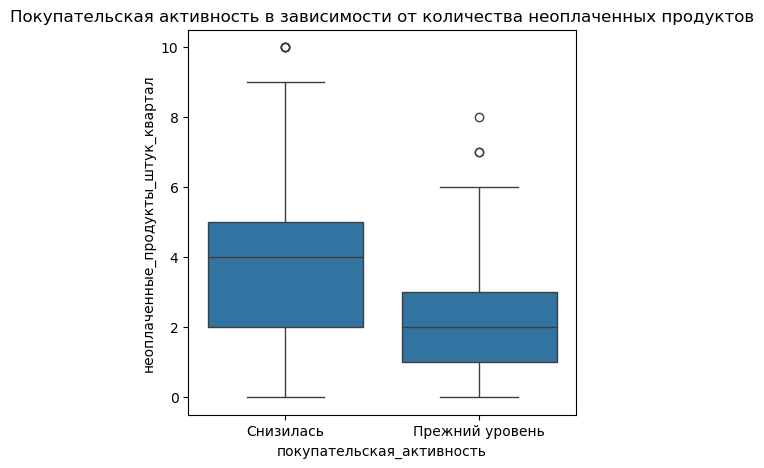

In [51]:
plt.figure(figsize=(5,5))
sns.boxplot(data=market_file, y='неоплаченные_продукты_штук_квартал', x='покупательская_активность')
plt.title('Покупательская активность в зависимости от количества неоплаченных продуктов')
plt.show()

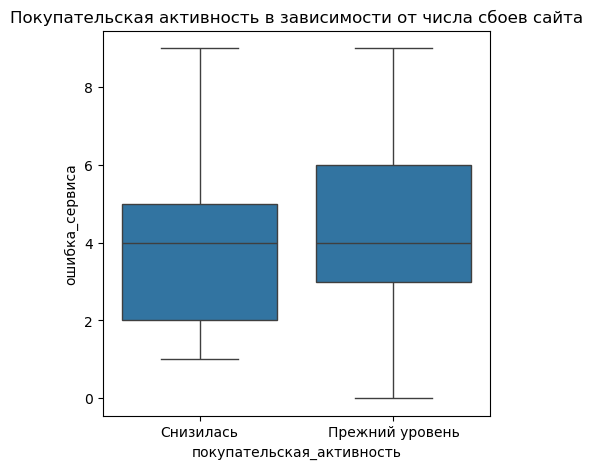

In [52]:
plt.figure(figsize=(5,5))
sns.boxplot(data=market_file, y='ошибка_сервиса', x='покупательская_активность')
plt.title('Покупательская активность в зависимости от числа сбоев сайта')
plt.show()

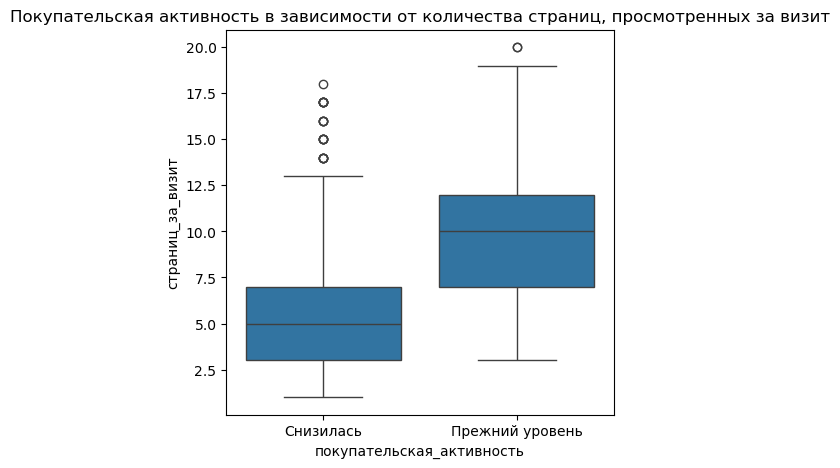

In [53]:
plt.figure(figsize=(5,5))
sns.boxplot(data=market_file, y='страниц_за_визит', x='покупательская_активность')
plt.title('Покупательская активность в зависимости от количества страниц, просмотренных за визит')
plt.show()

Задание. Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

In [54]:
market_money['активность'] = market_money['выручка'].apply(lambda x: 1 if x>0 else 0) 
market_money_3m = market_money.pivot_table(index='id', values='активность', aggfunc='sum').reset_index()
market_money_no_active = market_money_3m[market_money_3m['активность']<3]
no_activ_id = market_money_no_active['id'].unique()
market_money = market_money[~market_money['id'].isin(no_activ_id)]
market_money['id'].nunique()

1296

**Вывод:**

* Были визуализованы и изучены категориальные и количественные признаки.
В целевом признаке Покупательская активность выявлен дисбаланс классов, что в дальнейшем повлияет на выбор метрики
* Был удален выброс в столбце Выручка таблицы market_money
* Отобрала пользователей с покупательской активностью не менее 3х месяцев

#### Объединение таблиц

In [55]:
market_money_transform = market_money.pivot_table(index='id', columns=['период'], values='выручка').reset_index()
market_money_transform.head()

период,id,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
0,215349,5216.0,4472.0,4971.6
1,215350,5457.5,4826.0,5058.4
2,215351,6158.0,4793.0,6610.4
3,215352,5807.5,4594.0,5872.5
4,215353,4738.5,5124.0,5388.5


In [56]:
market_time_transform = market_time.pivot_table(index='id', columns=['период'], values='минут').reset_index()
market_time_transform.head()

период,id,предыдущий_месяц,текущий_месяц
0,215348,13.0,14.0
1,215349,12.0,10.0
2,215350,8.0,13.0
3,215351,11.0,13.0
4,215352,8.0,11.0


In [57]:
df = market_file.merge(market_money_transform, on='id', how='right')
df = df.merge(market_time_transform, on='id', how='left')
df = df.rename(
    columns={'предыдущий_месяц_x':'выручка_предыдущий_месяц', 
             'препредыдущий_месяц':'выручка_препредыдущий_месяц', 
             'текущий_месяц_x':'выручка_текущий_месяц',
             'текущий_месяц_y':'минут_текущий_месяц',
             'предыдущий_месяц_y':'минут_предыдущий_месяц'})
df

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,охотники_за_акциями,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,0,5216.0,4472.0,4971.6,12.0,10.0
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,0,5457.5,4826.0,5058.4,8.0,13.0
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,1,6158.0,4793.0,6610.4,11.0,13.0
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,1,5807.5,4594.0,5872.5,8.0,11.0
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,0,4738.5,5124.0,5388.5,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,0,3664.0,4704.0,4741.7,14.0,7.0
1292,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,0,4729.0,5299.0,5353.0,12.0,11.0
1293,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,0,5160.0,5334.0,5139.2,12.0,18.0
1294,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,0,4923.0,4725.0,5224.6,18.0,7.0


#### Корреляционный анализ

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'охотники_за_акциями', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


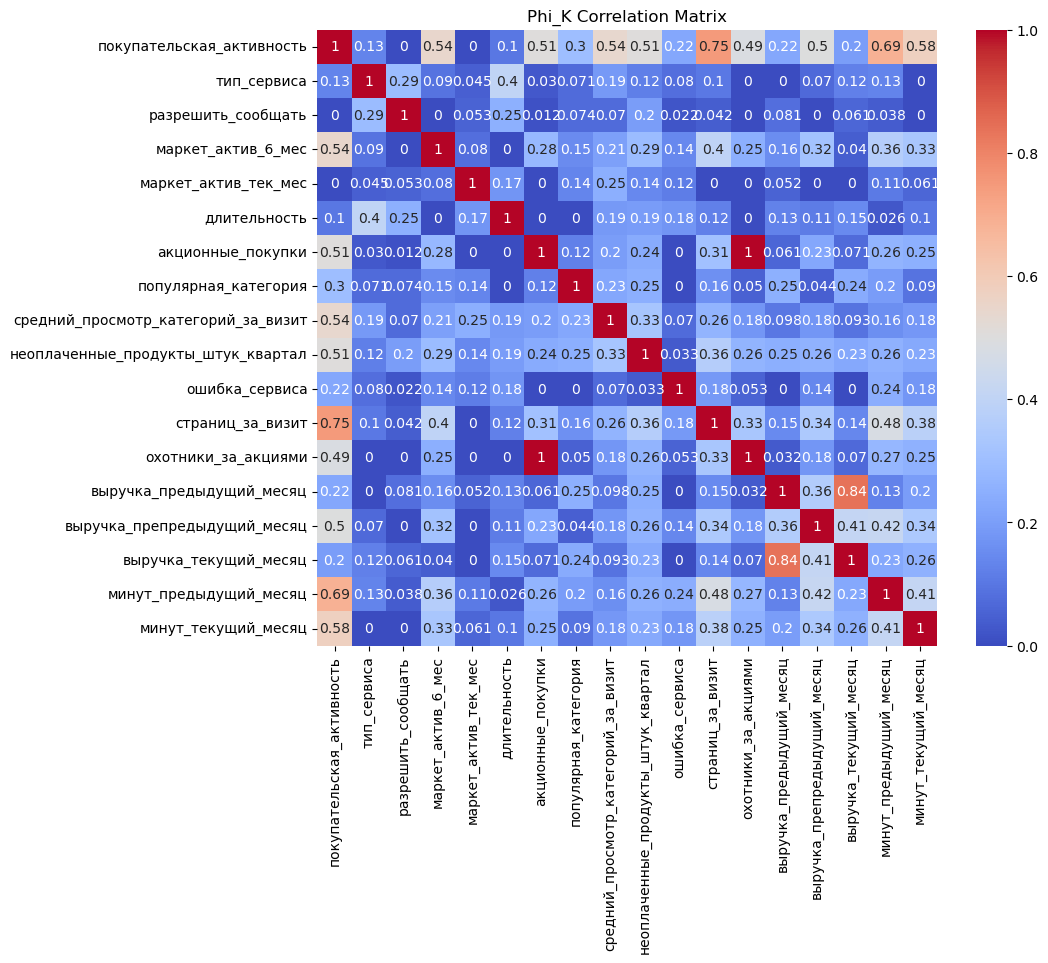

In [58]:
corr_matrix_phik = df.drop('id',axis=1).phik_matrix()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_phik, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

Отмечается корреляция между покупательской активностью и: маркет_актив_6_мес, акционные покупки, средний_просмотр_категорий_за_визит, неоплаченные_продукты_штук_квартал, страниц_за_визит, минут за предыдущий и текущий месяцы. Мультиколлинеарности нет.

#### Использование пайплайнов

In [61]:
encoder = LabelEncoder()

X = df.drop(['покупательская_активность','id', 'охотники_за_акциями'], axis=1)
y = encoder.fit_transform(df['покупательская_активность'])

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y
)

# создаём списки с названиями признаков
ohe_columns = ['популярная_категория']
ord_columns = ['тип_сервиса', 'разрешить_сообщать']
num_columns = ['маркет_актив_6_мес', 
               'маркет_актив_тек_мес', 
               'длительность', 'акционные_покупки', 
               'средний_просмотр_категорий_за_визит', 
               'неоплаченные_продукты_штук_квартал',
               'ошибка_сервиса', 'страниц_за_визит',
               'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц',
               'выручка_текущий_месяц', 'минут_предыдущий_месяц',
               'минут_текущий_месяц']

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
        )
    ]
)

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'], 
                    ['да', 'нет']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)


# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', OrdinalEncoder(), ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final= Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

param_grid = [
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # {
    # словарь для модели SVC()s
#        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
#        'models__kernel': ['linear', 'rbf'],
#        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
#    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Лучшая модель и её параметры:\n\n', randomized_search.best_params_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['популярная_категория']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['тип_сервиса',
                      

In [62]:
result = pd.DataFrame(randomized_search.cv_results_)
result[
    ['std_test_score', 'rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score')

,std_test_score,rank_test_score,param_models,mean_test_score,params
6,0.016718,1,"LogisticRegression(penalty='l1', random_state=...",0.898360,"{'preprocessor__num': MinMaxScaler(), 'models_..."
9,0.018063,2,"LogisticRegression(penalty='l1', random_state=...",0.896081,"{'preprocessor__num': StandardScaler(), 'model..."
3,0.017705,3,"LogisticRegression(penalty='l1', random_state=...",0.895879,"{'preprocessor__num': StandardScaler(), 'model..."
7,0.021455,4,"LogisticRegression(penalty='l1', random_state=...",0.893861,"{'preprocessor__num': 'passthrough', 'models__..."
8,0.014396,5,KNeighborsClassifier(),0.889767,"{'preprocessor__num': StandardScaler(), 'model..."
2,0.017163,6,KNeighborsClassifier(),0.887076,"{'preprocessor__num': StandardScaler(), 'model..."
4,0.011744,7,KNeighborsClassifier(),0.863675,"{'preprocessor__num': StandardScaler(), 'model..."
1,0.024641,8,KNeighborsClassifier(),0.861199,"{'preprocessor__num': MinMaxScaler(), 'models_..."
5,0.035034,9,KNeighborsClassifier(),0.752890,"{'preprocessor__num': 'passthrough', 'models__..."
0,0.030757,10,KNeighborsClassifier(),0.747564,"{'preprocessor__num': 'passthrough', 'models__..."


In [63]:
print ('Метрика лучшей модели на кросс-валидационной выборке:', randomized_search.best_score_)

X_train_2 = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
X_test_2 = pipe_final.named_steps['preprocessor'].transform(X_test)
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()
X_test_2 = pd.DataFrame(X_test_2, columns=feature_names)

y_test_pred = randomized_search.best_estimator_.named_steps['models'].predict_proba(X_test_2)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')


Метрика лучшей модели на кросс-валидационной выборке: 0.8983601518874247
Метрика ROC-AUC на тестовой выборке: 0.9146543704243012


Вывод: 
* Лучшая модель - LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')
* Лучший скейлер для масштабирования количественных признаков - MinMaxScaler()

* Метрика лучшей модели на кросс-валидационной выборке: 0.8983601518874247
* Метрика ROC-AUC на тестовой выборке:  0.9146543704243012

#### Анализ важности признаков

In [64]:
explainer = shap.Explainer(randomized_search.best_estimator_.named_steps['models'], X_train_2)
shap_values = explainer(X_test_2) 

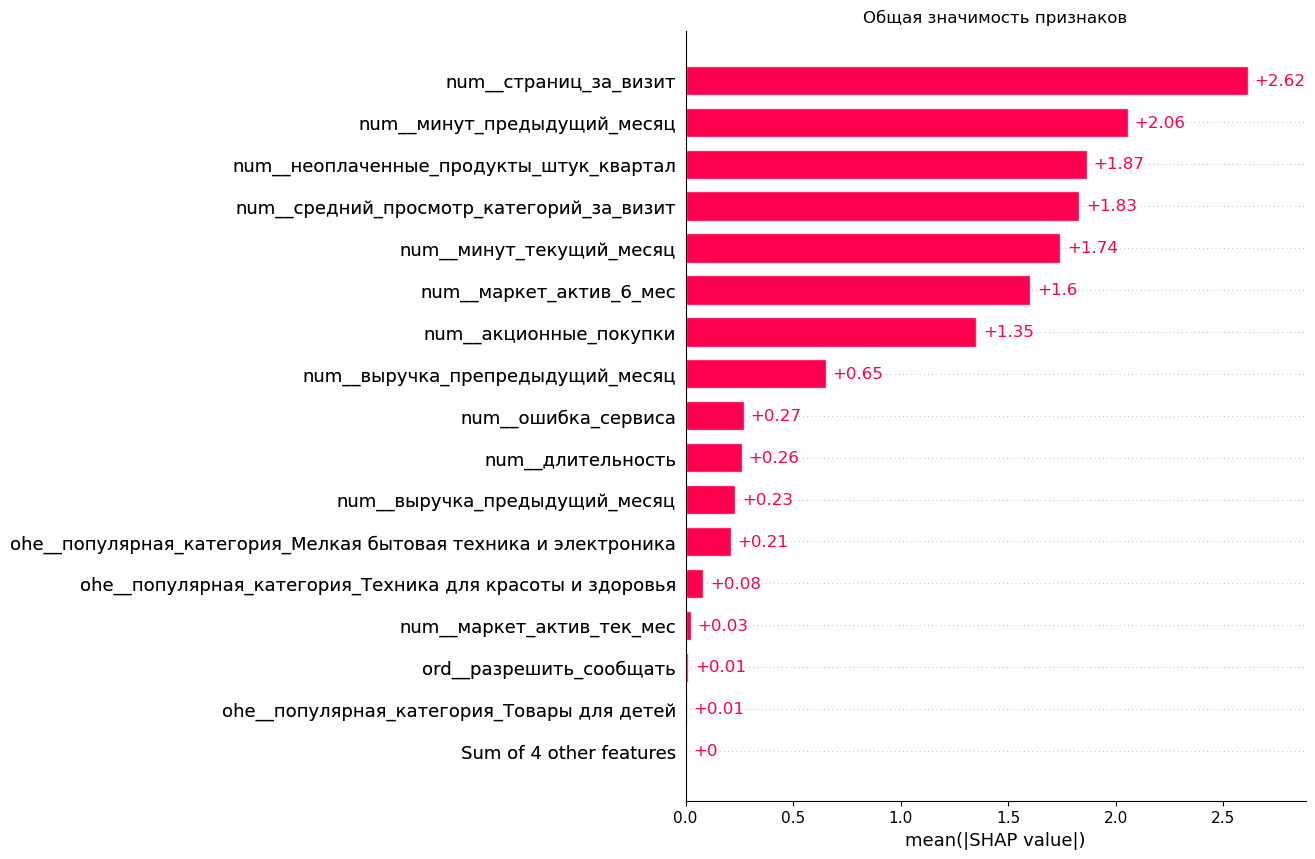

In [65]:
plt.title('Общая значимость признаков')
shap.plots.bar(shap_values, max_display=17)

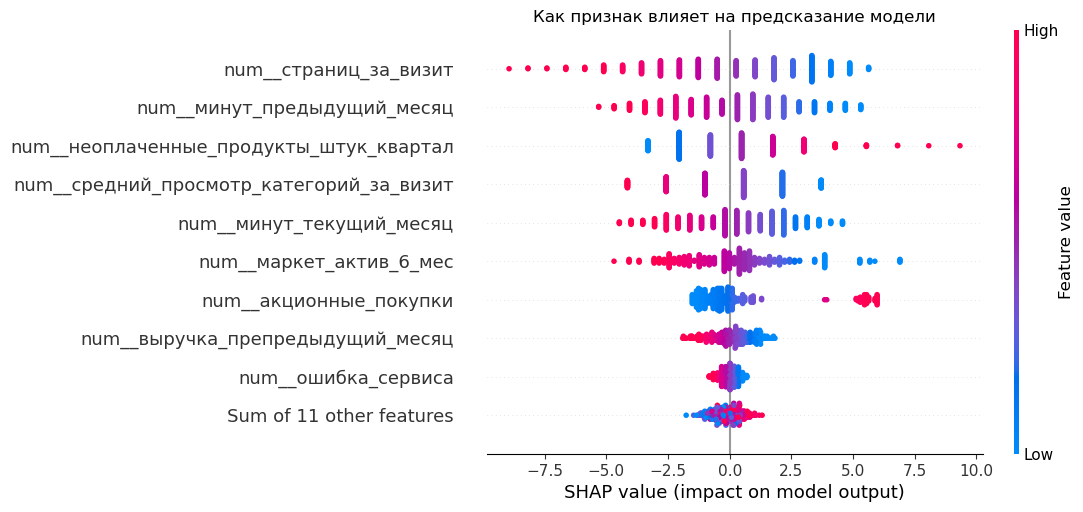

In [66]:
plt.title('Как признак влияет на предсказание модели')
shap.plots.beeswarm(shap_values)

3 недели сижу на этом шаге, жесткий дедлайн уже меня настиг. Никто мне помочь не может. Пробовала LinearExplainer, KernelExplainer. Хотела уже отдельно модель сначала обучить, но видела, что студентам возращают назад такие проекты. Это код, который кидал преподаватель в пачке. 


Отправляю незаконченный проект в надежде на Вас! Извините❤️

#### Сегментация покупателей

Ранее в исследовательском анализе данных мы увидели, что клиентов можно разделить на 2 группы: клиенты, у которых доля покупок по акциям составляет более и менее 80%. Также мы отмечали, что у клиентов с высокой долей акционных покупок часто фиксируется снижение покупательской активности.
Для более подробного изучения выбираю сегмент группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности

In [67]:
probas = randomized_search.best_estimator_.predict_proba(X)[:, 1]
df['probas'] = probas
df

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,охотники_за_акциями,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,probas
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,0,5216.0,4472.0,4971.6,12.0,10.0,0.868395
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,0,5457.5,4826.0,5058.4,8.0,13.0,0.328765
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,1,6158.0,4793.0,6610.4,11.0,13.0,0.771902
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,1,5807.5,4594.0,5872.5,8.0,11.0,0.947708
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,0,4738.5,5124.0,5388.5,10.0,10.0,0.603403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,0,3664.0,4704.0,4741.7,14.0,7.0,0.073635
1292,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,0,4729.0,5299.0,5353.0,12.0,11.0,0.082461
1293,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,0,5160.0,5334.0,5139.2,12.0,18.0,0.227179
1294,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,0,4923.0,4725.0,5224.6,18.0,7.0,0.164833


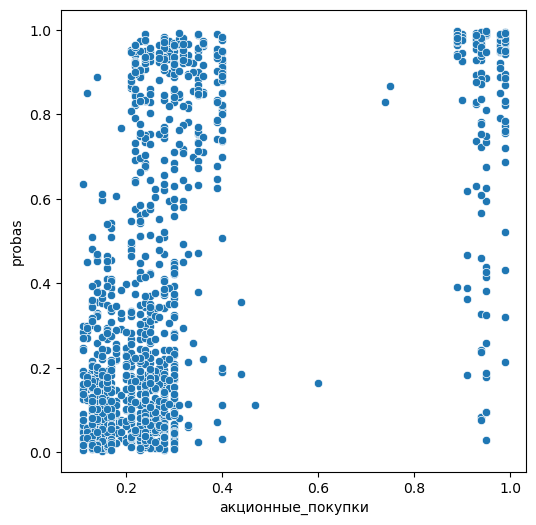

In [68]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, y='probas', x='акционные_покупки')
plt.show()

По графику видим, что увеличение количества клиентов с высоким риском снижения покупательской активностью и высокой долей покупок по акции начинается примерно с 0.7. Таким образом выделяем сегмент покупателей с акционными покупками >0.8 и вероятностью снижения покупательской активности >0.7

In [69]:
segment = df[(df['probas']>0.7)&(df['акционные_покупки']>0.8)]
segment

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,охотники_за_акциями,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,probas
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,1,6158.0,4793.0,6610.4,11.0,13.0,0.771902
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,1,5807.5,4594.0,5872.5,8.0,11.0,0.947708
13,215364,Снизилась,премиум,да,4.3,4,708,0.98,Домашний текстиль,3,3,3,3,1,5795.5,4942.0,5484.8,11.0,9.0,0.949259
14,215365,Снизилась,стандарт,да,3.9,4,167,0.95,Техника для красоты и здоровья,6,4,2,5,1,4577.0,4190.0,4799.3,6.0,10.0,0.885992
22,215373,Снизилась,премиум,нет,3.8,3,811,0.90,Товары для детей,2,5,5,3,1,4632.0,4293.0,5161.1,10.0,8.0,0.986042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,216397,Прежний уровень,стандарт,да,4.2,5,199,0.94,Товары для детей,4,2,6,4,1,3846.0,4471.0,4518.1,14.0,11.0,0.778004
1069,216421,Прежний уровень,премиум,да,4.1,3,302,0.95,Товары для детей,2,2,2,6,1,5768.0,5267.0,5463.8,13.0,18.0,0.748596
1093,216445,Прежний уровень,стандарт,да,4.9,5,307,0.99,Техника для красоты и здоровья,1,2,6,9,1,3061.0,4351.0,4309.0,18.0,9.0,0.719236
1212,216564,Прежний уровень,стандарт,да,5.6,4,342,0.94,Кухонная посуда,2,7,5,8,1,4930.0,5269.0,4766.2,14.0,19.0,0.754703


Выделили в сегмент 128 клиентов

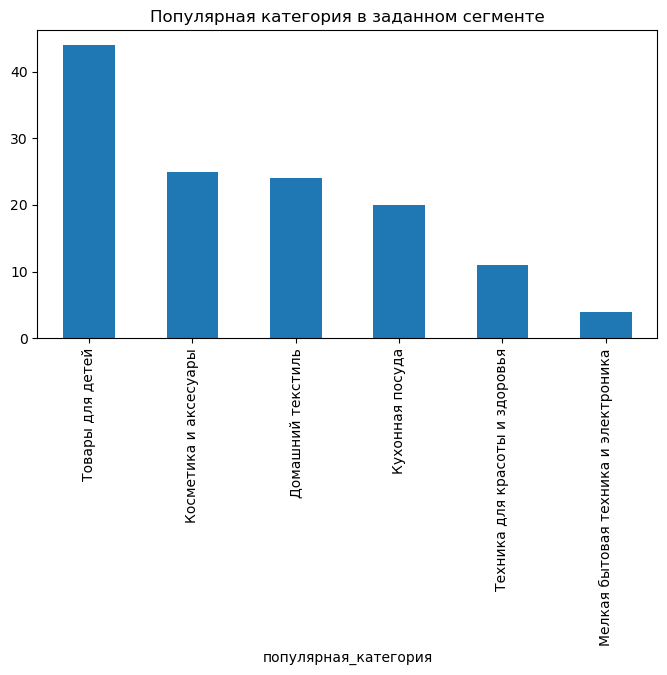

In [70]:
plt.figure(figsize=(8,4))
segment.value_counts('популярная_категория').plot(kind='bar')
plt.title('Популярная категория в заданном сегменте')
plt.show()

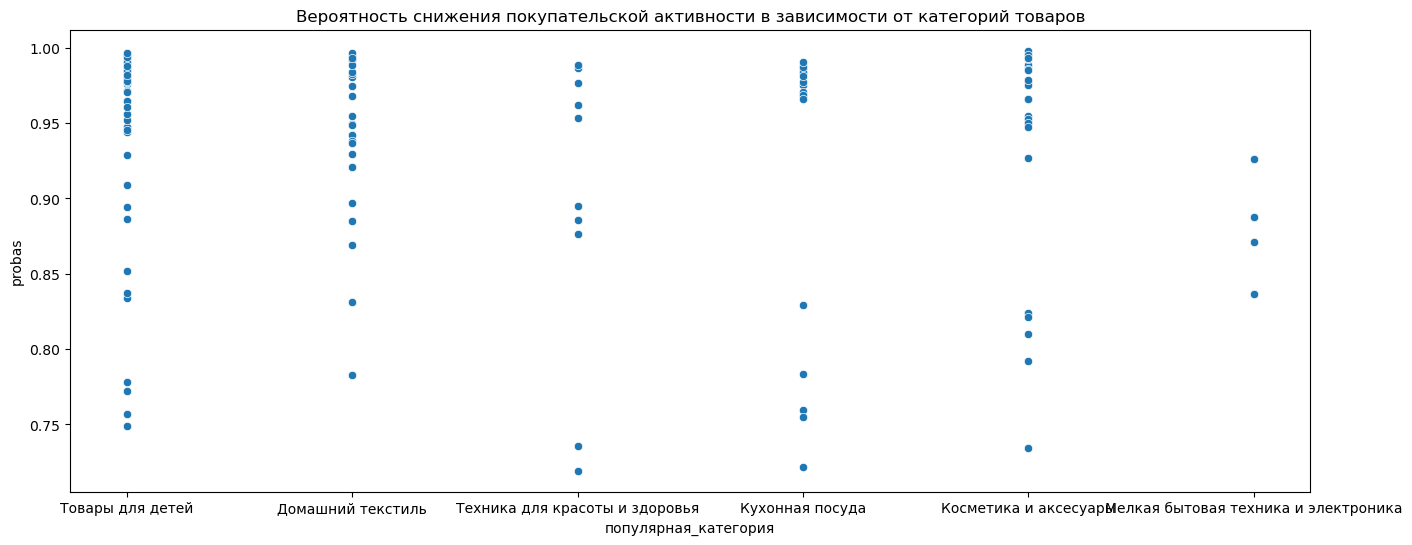

In [71]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=segment, y='probas', x='популярная_категория')
plt.title('Вероятность снижения покупательской активности в зависимости от категорий товаров')
plt.show()

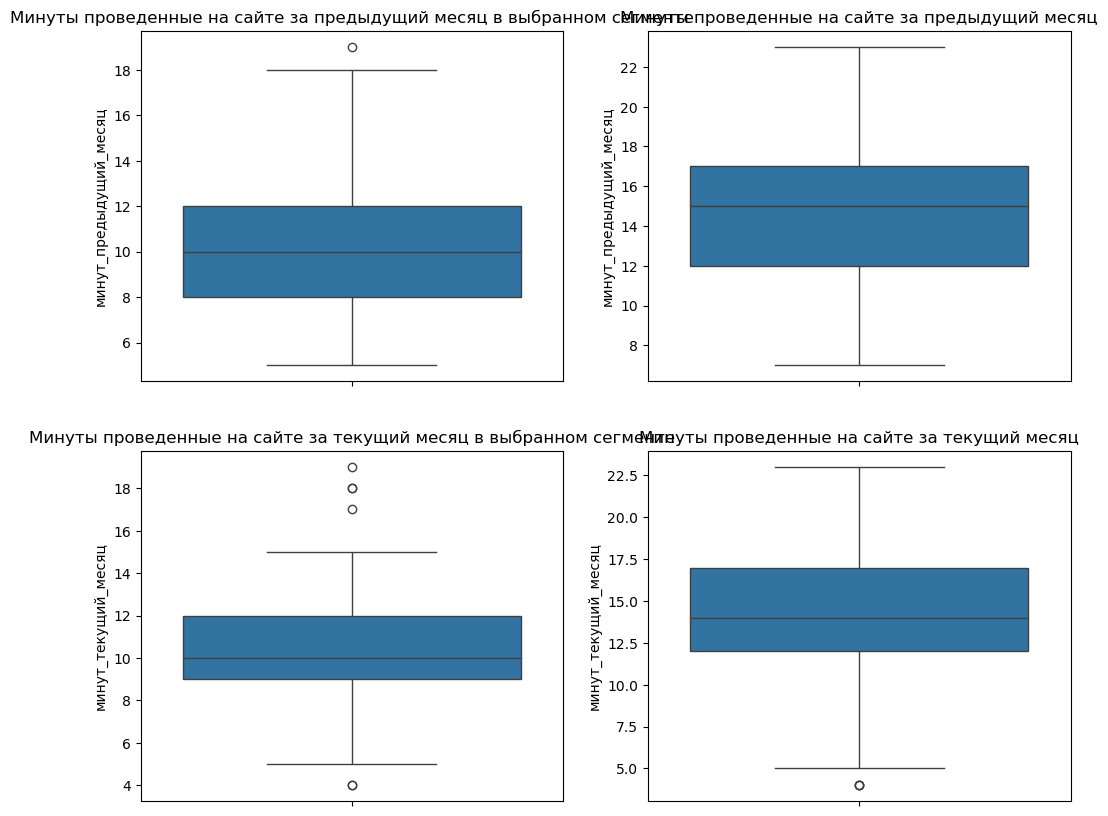

In [72]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(data=segment, y='минут_предыдущий_месяц')
plt.title('Минуты проведенные на сайте за предыдущий месяц в выбранном сегменте')
plt.subplot(2,2,2)
sns.boxplot(data=df[(df['probas']<0.7)&(df['акционные_покупки']<0.8)], y='минут_предыдущий_месяц')
plt.title('Минуты проведенные на сайте за предыдущий месяц')
plt.subplot(2,2,3)
sns.boxplot(data=segment, y='минут_текущий_месяц')
plt.title('Минуты проведенные на сайте за текущий месяц в выбранном сегменте')
plt.subplot(2,2,4)
sns.boxplot(data=df[(df['probas']<0.7)&(df['акционные_покупки']<0.8)], y='минут_текущий_месяц')
plt.title('Минуты проведенные на сайте за текущий месяц')
plt.show()

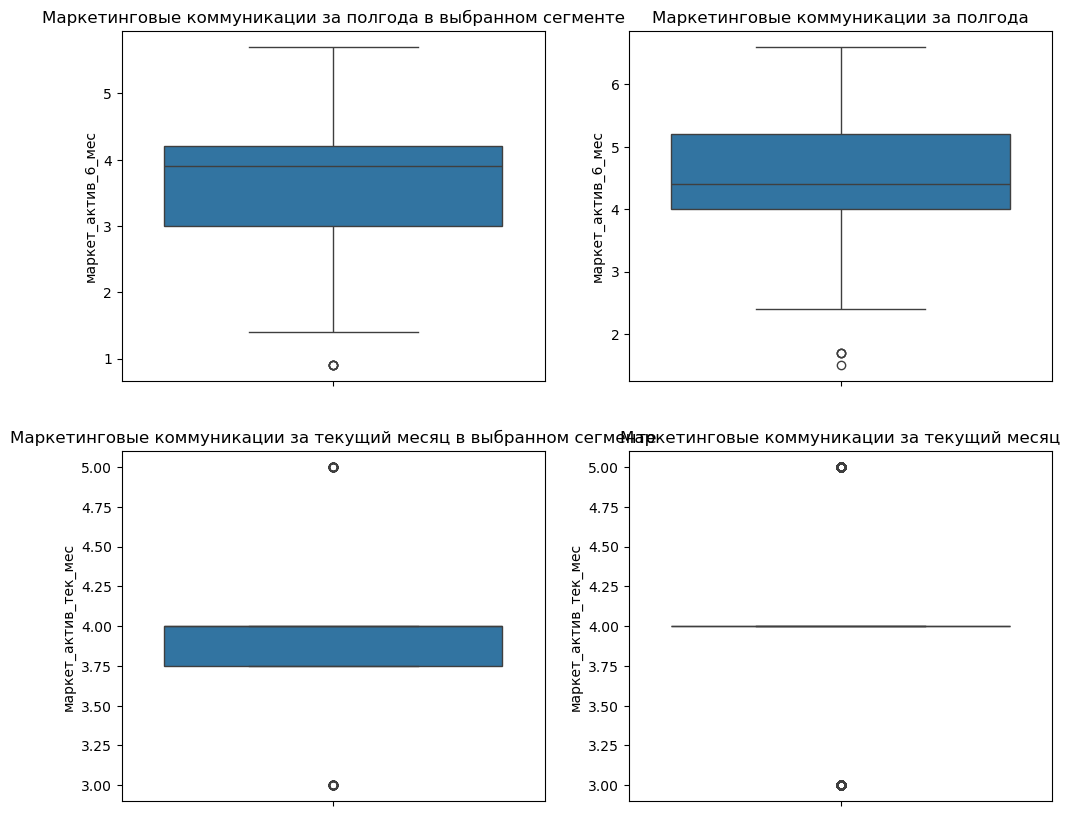

In [73]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(data=segment, y='маркет_актив_6_мес')
plt.title('Маркетинговые коммуникации за полгода в выбранном сегменте')
plt.subplot(2,2,2)
sns.boxplot(data=df[(df['probas']<0.7)&(df['акционные_покупки']<0.8)], y='маркет_актив_6_мес')
plt.title('Маркетинговые коммуникации за полгода')
plt.subplot(2,2,3)
sns.boxplot(data=segment, y='маркет_актив_тек_мес')
plt.title('Маркетинговые коммуникации за текущий месяц в выбранном сегменте')
plt.subplot(2,2,4)
sns.boxplot(data=df[(df['probas']<0.7)&(df['акционные_покупки']<0.8)], y='маркет_актив_тек_мес')
plt.title('Маркетинговые коммуникации за текущий месяц')
plt.show()

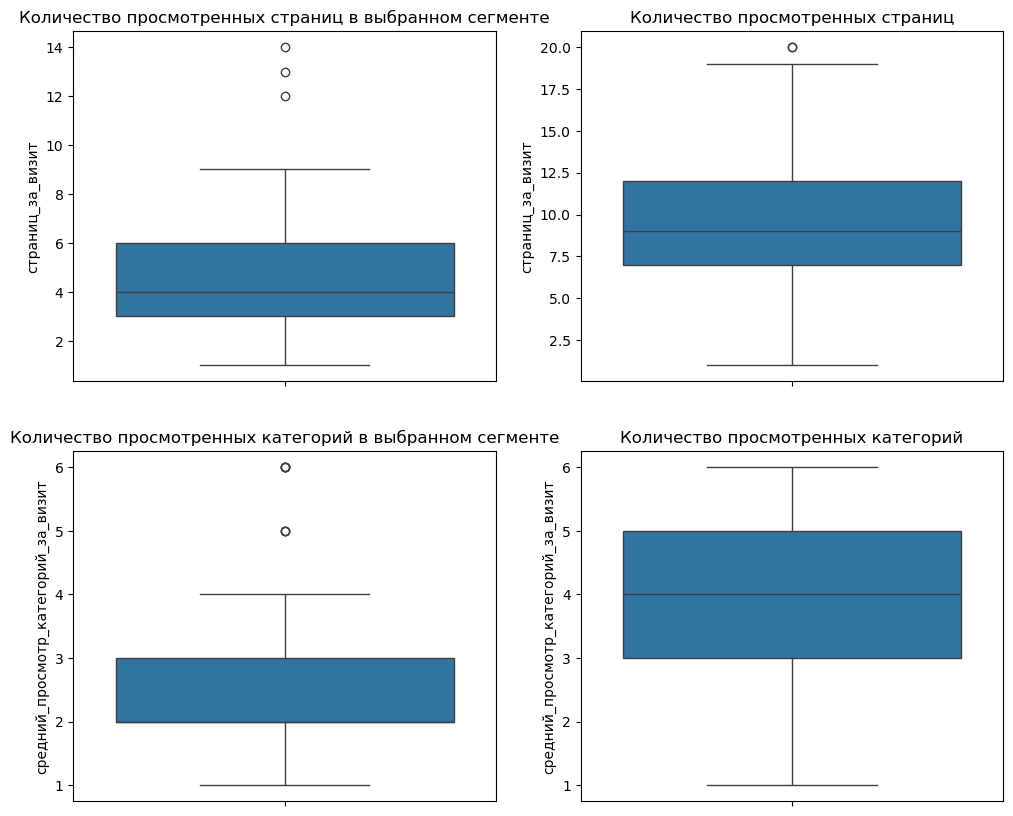

In [74]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(data=segment, y='страниц_за_визит')
plt.title('Количество просмотренных страниц в выбранном сегменте')
plt.subplot(2,2,2)
sns.boxplot(data=df[(df['probas']<0.7)&(df['акционные_покупки']<0.8)], y='страниц_за_визит')
plt.title('Количество просмотренных страниц')
plt.subplot(2,2,3)
sns.boxplot(data=segment, y='средний_просмотр_категорий_за_визит')
plt.title('Количество просмотренных категорий в выбранном сегменте')
plt.subplot(2,2,4)
sns.boxplot(data=df[(df['probas']<0.7)&(df['акционные_покупки']<0.8)], y='средний_просмотр_категорий_за_визит')
plt.title('Количество просмотренных категорий')
plt.show()

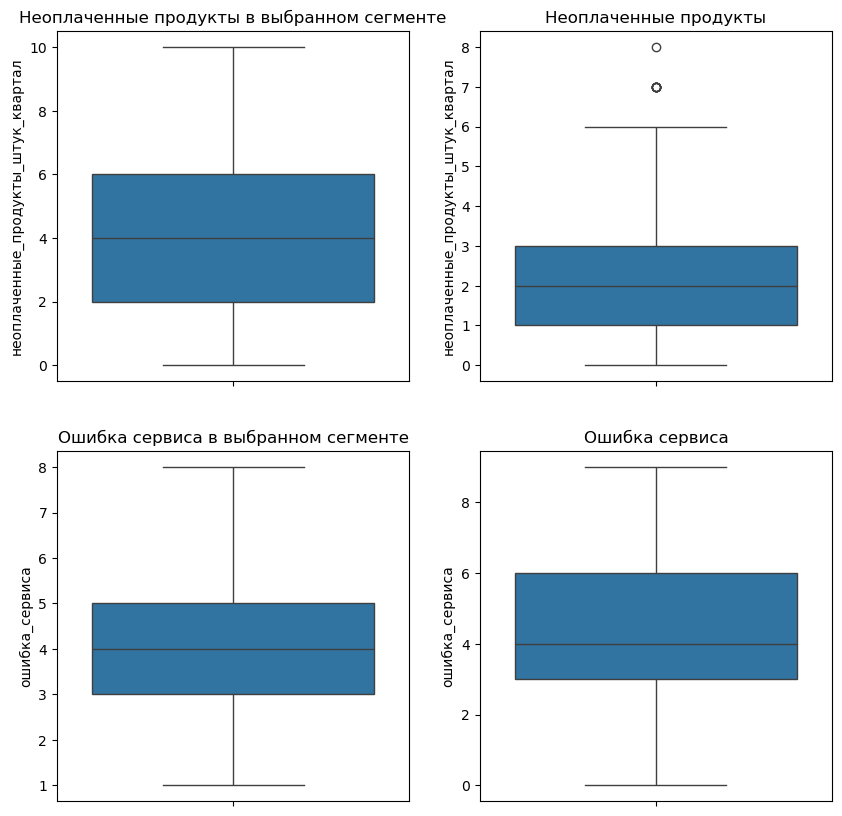

In [75]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data=segment, y='неоплаченные_продукты_штук_квартал')
plt.title('Неоплаченные продукты в выбранном сегменте')
plt.subplot(2,2,2)
sns.boxplot(data=df[(df['probas']<0.7)&(df['акционные_покупки']<0.8)], y='неоплаченные_продукты_штук_квартал')
plt.title('Неоплаченные продукты')
plt.subplot(2,2,3)
sns.boxplot(data=segment, y='ошибка_сервиса')
plt.title('Ошибка сервиса в выбранном сегменте')
plt.subplot(2,2,4)
sns.boxplot(data=df[(df['probas']<0.7)&(df['акционные_покупки']<0.8)], y='ошибка_сервиса')
plt.title('Ошибка сервиса')
plt.show()

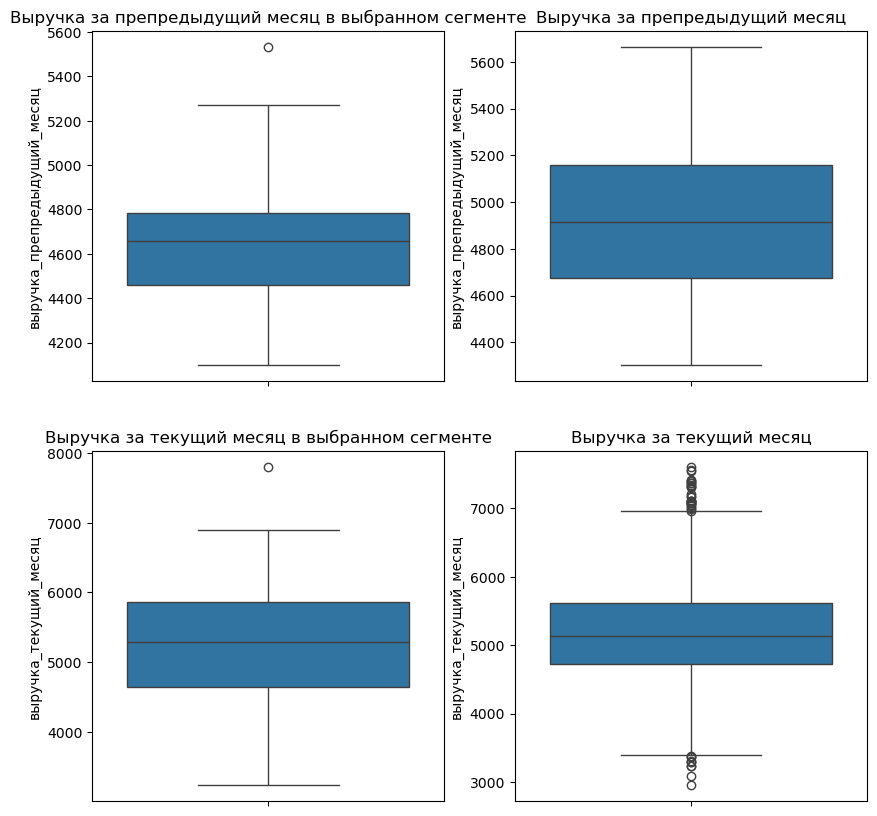

In [76]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data=segment, y='выручка_препредыдущий_месяц')
plt.title('Выручка за препредыдущий месяц в выбранном сегменте')
plt.subplot(2,2,2)
sns.boxplot(data=df[(df['probas']<0.7)&(df['акционные_покупки']<0.8)], y='выручка_препредыдущий_месяц')
plt.title('Выручка за препредыдущий месяц')
plt.subplot(2,2,3)
sns.boxplot(data=segment, y='выручка_текущий_месяц')
plt.title('Выручка за текущий месяц в выбранном сегменте')
plt.subplot(2,2,4)
sns.boxplot(data=df[(df['probas']<0.7)&(df['акционные_покупки']<0.8)], y='выручка_текущий_месяц')
plt.title('Выручка за текущий месяц')
plt.show()

При исследовании выбранного сегмента можно сделать выводы, что у клиентов с большой долей покупок по акциям и низкой покупательской активностью:
* самые популярные категории товаров: товары для детей, косметика и аксессуары, домашний текстиль. Самая непопулярная категория - мелкая бытовая техника и электроника 
* меньше количество минут, проведенных на сайте, а также меньшее количество просмотренных страниц и категорий товаров
* меньше маркетинговых коммуникаций за последние 6 месяцев
* больше неоплаченных продуктов
* меньше выручка за препредыдущий месяц

Для повышения покупательской активности данного сегмента можно предложить:
* увеличить количество маркетинговых коммуникаций (рассылок, звонков, показов рекламы)
* введение на сайт рекомендательных систем/улучшение существующих
* предлагать скидки/промокоды для популярных у сегмента категорий: товары для детей, косметика и аксессуары, домашний текстиль
* рассылка на эл.почту о неоплаченных продуктах в корзине


#### Общий вывод

Была дана задача разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.
Для этого нужно было:
* построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
* используя данные модели и данные о прибыльности клиентов, выделить сегмент покупателей и разработать для них персонализированные предложения.

Были даны 4 таблицы: market_file (таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении), market_money (таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом), market_time (таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода), money (таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю). В ходе предобработки данных столбцы были приведены к змеиному регистру, были удалены неявные дубликаты в market_file и market_time, тип прибыли object в money был переведен во float.

Используя пайплайн были обучены 4 модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Учитывая дисбаланс классов, была выбрана метрика rock_auc. Лучшей моделью оказалась SVC(probability=True, random_state=42), лучший скейлер для масштабирования количественных признаков - MinMaxScaler().

При анализе shap-значений были выделены признаки, которые больше всего влияют на предсказание модели. 

Далее был выбран сегмент клинтов с низкой покупательской активностью и высокой долей акционных покупок. При исследовании выбранного сегмента были сделаны выводы, что у клиентов с большой долей покупок по акциям и низкой покупательской активностью:

* самые популярные категории товаров: товары для детей, косметика и аксессуары, домашний текстиль. Самая непопулярная категория - мелкая бытовая техника и электроника
* меньше количество минут, проведенных на сайте, а также меньшее количество просмотренных страниц и категорий товаров
* меньше маркетинговых коммуникаций за последние 6 месяцев
* больше неоплаченных продуктов
* меньше выручка за препредыдущий месяц

Для повышения покупательской активности данного сегмента можно предложить:
* увеличить количество маркетинговых коммуникаций (рассылок, звонков, показов рекламы)
* введение на сайт рекомендательных систем/улучшение существующих
* предлагать скидки/промокоды для популярных у сегмента категорий: товары для детей, косметика и аксессуары, домашний текстиль
* рассылка на эл.почту о неоплаченных продуктах в корзине